<h2>Player Performance Prediction</h2>

<p>In this case study, we will predict the performance (runs scored) by a player based on some features. It will take some features including:
<ol>
    <li>Total Matches played by a player</li>
    <li>Batting Average</li>
    <li>Bowling Average</li>
    <li>Age</li>
</ol>
on the base of these features we will predict <code>total runs scored</code> by a player using <code>Linear Regression</code>
</p>

<h4>Importing Required Libraries</h4>

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

<h4>Importing Data Set</h4>

In [33]:
# Load data
data = pd.read_csv('cricket_data.csv')

In [34]:
data.head()

,player_id,age,matches_played,batting_average,bowling_average,runs_scored
0,1,33,76,40,35,3642
1,2,25,52,43,31,3868
2,3,29,26,26,22,3494
3,4,40,31,40,20,2723
4,5,23,79,46,37,4634


In [35]:
data.sample(10)

,player_id,age,matches_played,batting_average,bowling_average,runs_scored
261,262,38,31,34,36,2838
527,528,33,27,30,49,2635
301,302,48,90,38,45,3664
465,466,37,30,36,20,3355
211,212,48,28,46,29,3252
291,292,43,38,47,39,3122
327,328,26,37,25,32,3396
133,134,29,94,36,34,2829
591,592,40,31,43,21,4929
102,103,22,20,44,41,2987


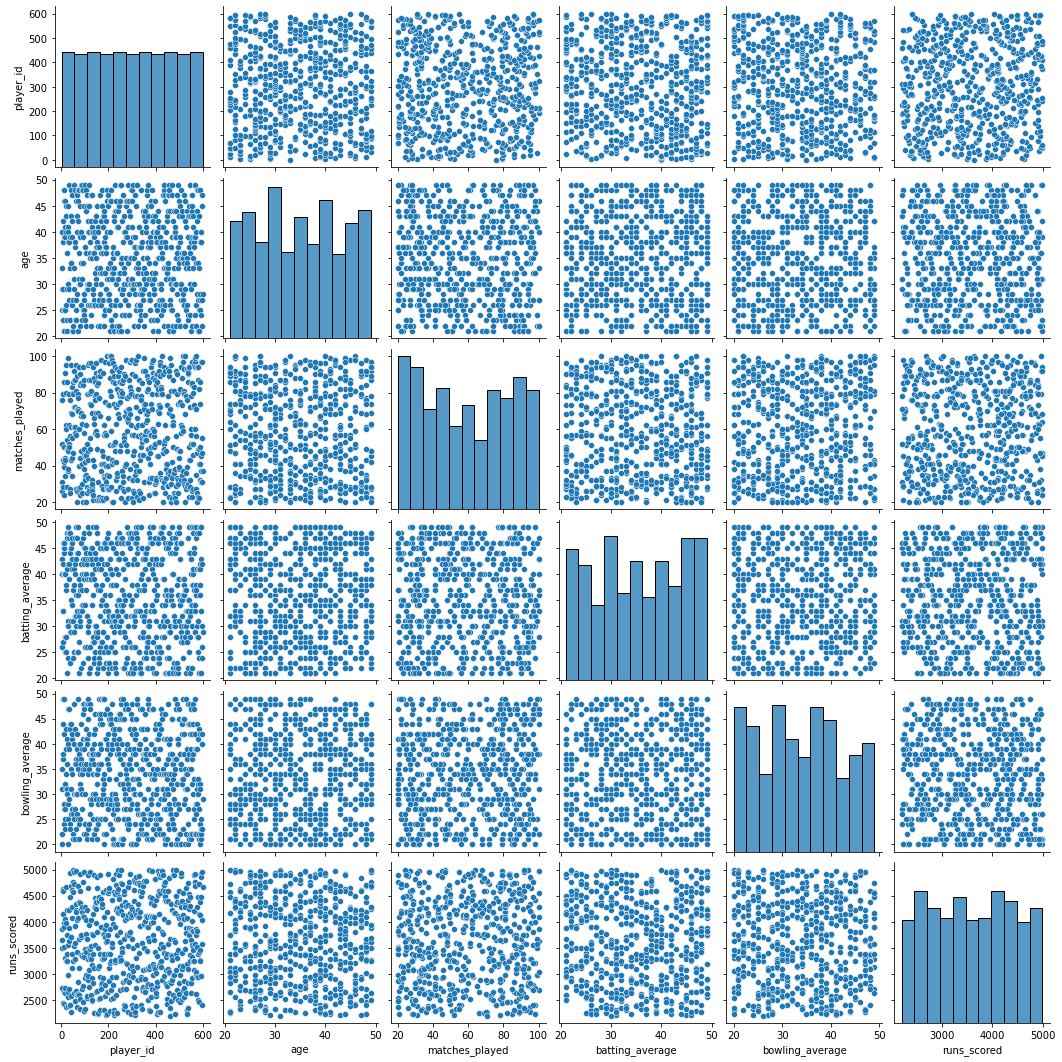

In [36]:
sns.pairplot(data)

<AxesSubplot:>

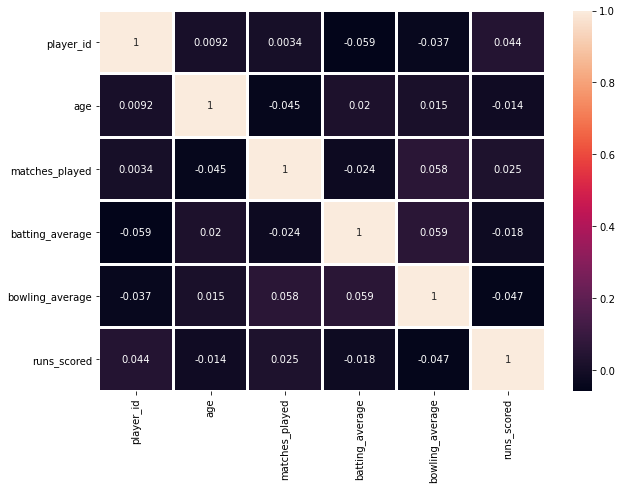

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,linewidths=2)

<h4>Spliting Data Set features (Dependet and Independent)</h4>

In [38]:
# all the features stored in X are independent
X = data.drop(['player_id', 'runs_scored'], axis=1)
# the feature stored in y is dependent
y = data['runs_scored']

In [39]:
X.sample(5)

,age,matches_played,batting_average,bowling_average
323,33,100,33,22
543,45,43,25,44
390,42,98,24,23
362,47,89,26,24
313,37,35,22,30


In [40]:
y.sample(5)

268    2381
460    2836
401    2570
404    2778
557    3820
Name: runs_scored, dtype: int64

In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

<h4>Evaluate model performance</h4>

In [43]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 858.326365469731


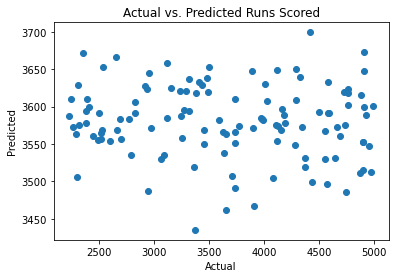

In [45]:
# Create visualizations
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Runs Scored')
plt.show()

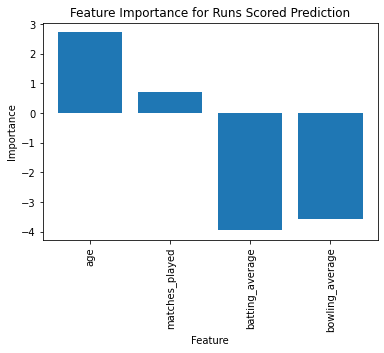

In [11]:
# Plot feature importance
importance = model.coef_
plt.bar(X.columns, importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Runs Scored Prediction')
plt.xticks(rotation=90)
plt.show()

<h4 style="color:green">Make Prediction<h4>
<p>We have successfull trained a model and now its time to provide featues to model and predict</p>

<p><b>Indepedent Features:</b>
<ol>
    <li>Age : 30</li>
    <li>Matches Played : 250</li>
    <li>Batting Average : 40</li>
    <li>Bowling Average : 33</li>
</ol>
</p>
<b>Depedent Feature:</b>
<li>Predict total runs scored by a Player</li>

In [56]:
result=model.predict([[30,250,4,33]])
int(result[0])

3825

Total Runs by a Player are <code>3825</code>